In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('dataset/Weather.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_19428\1574494852.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('dataset/Weather.csv')


In [4]:
dataset.shape

(119040, 31)

In [5]:
dataset.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [6]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'MaxTemp')

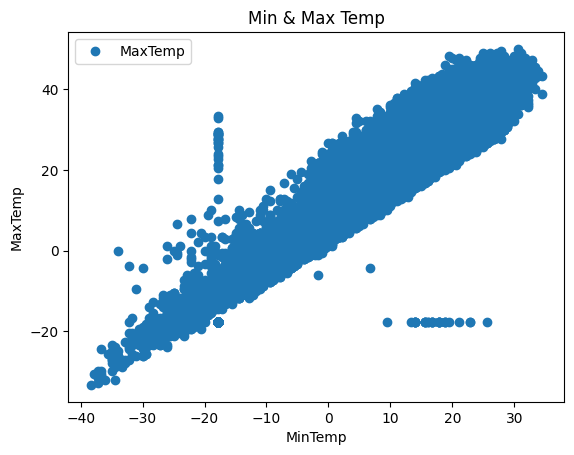

In [11]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('Min & Max Temp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


In [15]:
x = dataset["MinTemp"].values.reshape(-1,1)

In [16]:
y = dataset["MaxTemp"].values.reshape(-1,1)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_predict = model.predict(x_test)

In [21]:
print(y_predict)

[[33.67035117]
 [30.0912513 ]
 [26.51215143]
 ...
 [32.64775121]
 [30.60255128]
 [31.62515124]]


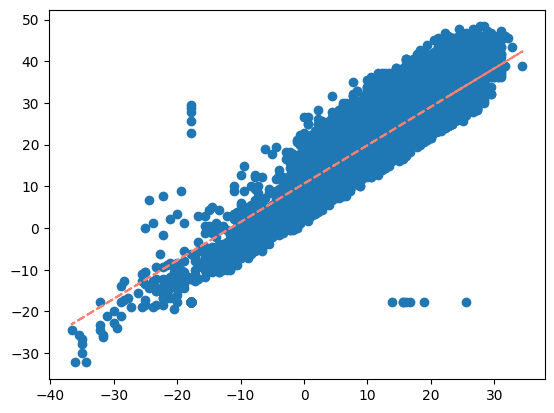

In [36]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,color='salmon',linewidth=1.5,linestyle='--')

In [38]:
# แปลงอาร์เรย์หลายมิติเป็นอาร์เรย์หนึ่งมิติ
y_test_1d = y_test.flatten()
y_predict_1d = y_predict.flatten()

In [39]:
df = pd.DataFrame({'Actually':y_test_1d,'Predicted':y_predict_1d})

In [42]:
df.head()

,Actually,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


In [43]:
df.shape

(23808, 2)

In [44]:
df1 = df.head(20)

<Axes: >

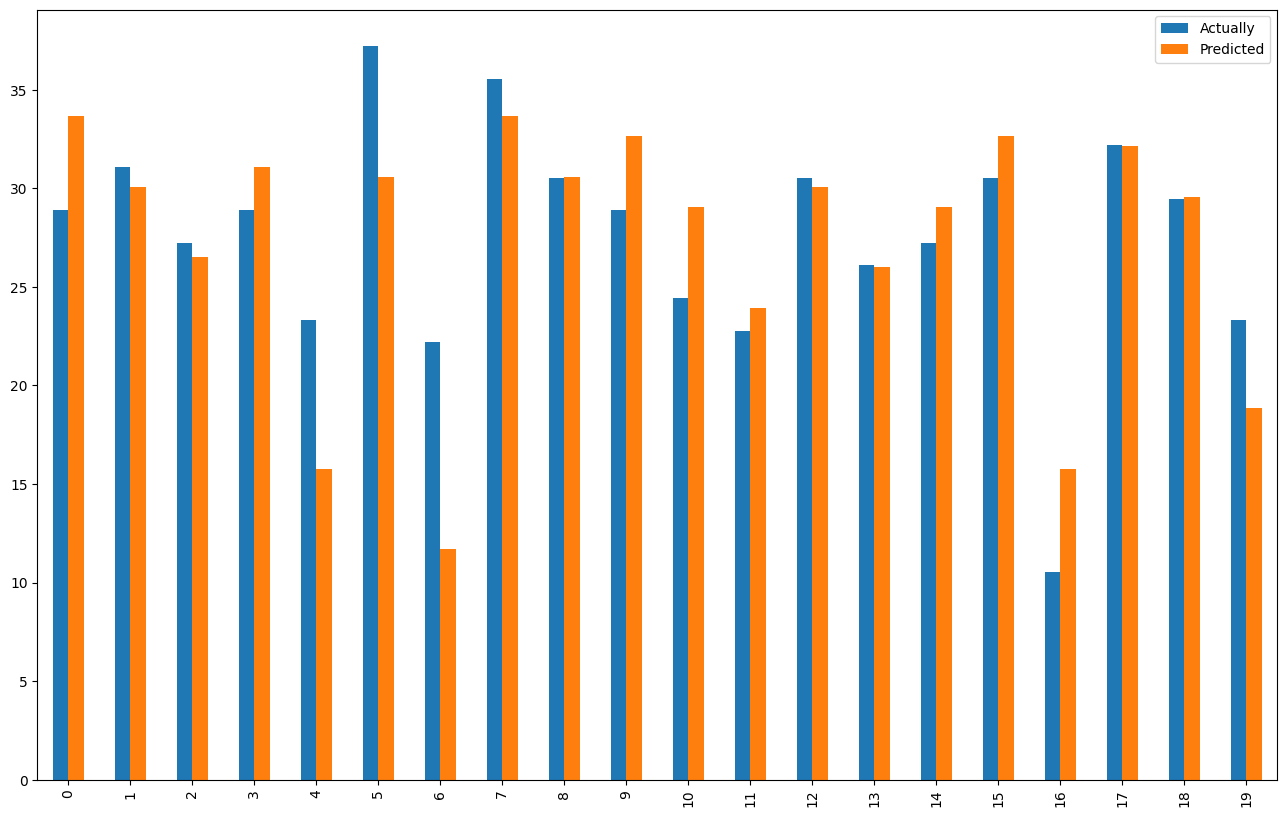

In [46]:
df1.plot(kind="bar",figsize=(16,10))